In [68]:
import polars as pl
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
sns.set(rc={
    'figure.figsize':(12,10),
})

plt.style.use("Solarize_Light2")

In [3]:
tracks_lf = pl.scan_csv('data/music-info-clean.csv')

In [4]:
tracks_slice_lf = tracks_lf.filter(
    pl.col('playcount').is_between(
        pl.col('playcount').quantile(0.5),
        pl.col('playcount').quantile(0.9)
    )
).sort(by='playcount', descending=True)

tracks_slice_lf.limit(20).collect()

track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount
str,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,i64
"""TRLONXS128F42B…","""Psychobabble""","""Frou Frou""","""https://p.scdn…","""0TBDZGNbeZnb8B…",2002,333773,0.487,0.921,11,-5.712,0,0.148,0.546,0.0,0.147,0.285,77.984,4,"""mellow;ambient…",1855
"""TRQRWWM128F426…","""Serenity Paint…","""Opeth""","""https://p.scdn…","""0AOnAShhO4d2av…",1999,553800,0.202,0.937,2,-4.273,1,0.0986,0.000322,0.246,0.233,0.201,82.4,4,"""metal;death_me…",1854
"""TRGHHJF128F42B…","""Outlaw Torn""","""Metallica""","""https://p.scdn…","""1McNhH5IvGZaj7…",1999,598906,0.327,0.869,10,-5.312,0,0.0461,0.0000142,0.00354,0.98,0.409,123.896,4,"""metal;heavy_me…",1854
"""TRQBGFW128F931…","""Mon Pays""","""Yelle""","""https://p.scdn…","""0GBKa0phEzryvw…",2011,272413,0.532,0.934,0,-2.609,1,0.0325,0.0305,0.11,0.359,0.471,99.98,4,"""electronic;pop…",1854
"""TRDBQXT128F428…","""Wattershed""","""Foo Fighters""","""https://p.scdn…","""3BBdpakPhV371y…",1995,133506,0.178,0.967,3,-6.9,1,0.077,0.001,0.000297,0.365,0.47,190.586,4,"""90s;hard_rock;…",1854
"""TRUDXEG128F934…","""Marianas Trenc…","""August Burns R…","""https://p.scdn…","""08jRL4KHoHjSBx…",2019,257707,0.201,0.957,8,-6.777,1,0.1,0.0001,0.091,0.0891,0.0995,140.972,5,"""hardcore;metal…",1853
"""TRNSKDK128F424…","""Overpowered""","""Róisín Murphy""","""https://p.scdn…","""06J0LycYNnhH7T…",2012,240240,0.743,0.796,3,-6.442,0,0.0366,0.13,0.00157,0.187,0.816,117.037,4,"""dance;trip_hop…",1852
"""TRWATZW128F92F…","""My Favourite B…","""Stars""","""https://p.scdn…","""0Iveq9Z0eKbncL…",2008,245280,0.621,0.507,1,-11.724,1,0.0669,0.541,0.00661,0.107,0.559,87.348,4,"""indie;rock;chi…",1852
"""TRDHQRL128F426…","""Hitch A Ride""","""Boston""","""https://p.scdn…","""0870QNicMawQH2…",1976,251733,0.383,0.814,3,-7.23,1,0.0405,0.0011,0.00406,0.101,0.569,116.454,4,"""classic_rock;p…",1851


In [5]:
tracks_slice_lf.select('playcount').collect().describe()

describe,playcount
str,f64
"""count""",11747.0
"""null_count""",0.0
"""mean""",598.043756
"""std""",433.996643
"""min""",139.0
"""max""",1855.0
"""median""",447.0
"""25%""",252.0
"""75%""",831.0


In [24]:
df = tracks_slice_lf.collect().to_pandas()

In [6]:
tracks_slice_lf.columns

['track_id',
 'name',
 'artist',
 'spotify_preview_url',
 'spotify_id',
 'year',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'genres',
 'playcount']

In [43]:
features = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

target = 'playcount'

feature_columns = [pl.col(feature) for feature in features]
tracks_slice_lf.select(feature_columns).fetch(1)

danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.554,0.49,-8.046,0.0457,0.0168,0.000534,0.136,0.513,84.275


In [44]:
tracks_slice_lf.with_columns(pl.col(target).cast(pl.Float64)).select([pl.corr(col, pl.col(target)) for col in feature_columns]).collect()

danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.091309,-0.042241,0.003854,-0.032254,0.034856,-0.068675,-0.001555,0.08103,-0.003362


In [62]:
corr_matrix = tracks_slice_lf.select(feature_columns).collect().corr()
corr_matrix

danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.077644,-0.003195,0.015075,0.00818,-0.092204,-0.123393,0.531069,-0.124831
-0.077644,1.0,0.791591,0.249079,-0.729804,-0.165929,0.205727,0.201798,0.227375
-0.003195,0.791591,1.0,0.158637,-0.629281,-0.326279,0.11529,0.194258,0.185096
0.015075,0.249079,0.158637,1.0,-0.139984,-0.094752,0.157178,0.011168,0.068624
0.00818,-0.729804,-0.629281,-0.139984,1.0,0.137457,-0.118125,-0.148023,-0.197248
-0.092204,-0.165929,-0.326279,-0.094752,0.137457,1.0,-0.03296,-0.23736,-0.063965
-0.123393,0.205727,0.11529,0.157178,-0.118125,-0.03296,1.0,-0.028021,0.02341
0.531069,0.201798,0.194258,0.011168,-0.148023,-0.23736,-0.028021,1.0,0.063148
-0.124831,0.227375,0.185096,0.068624,-0.197248,-0.063965,0.02341,0.063148,1.0


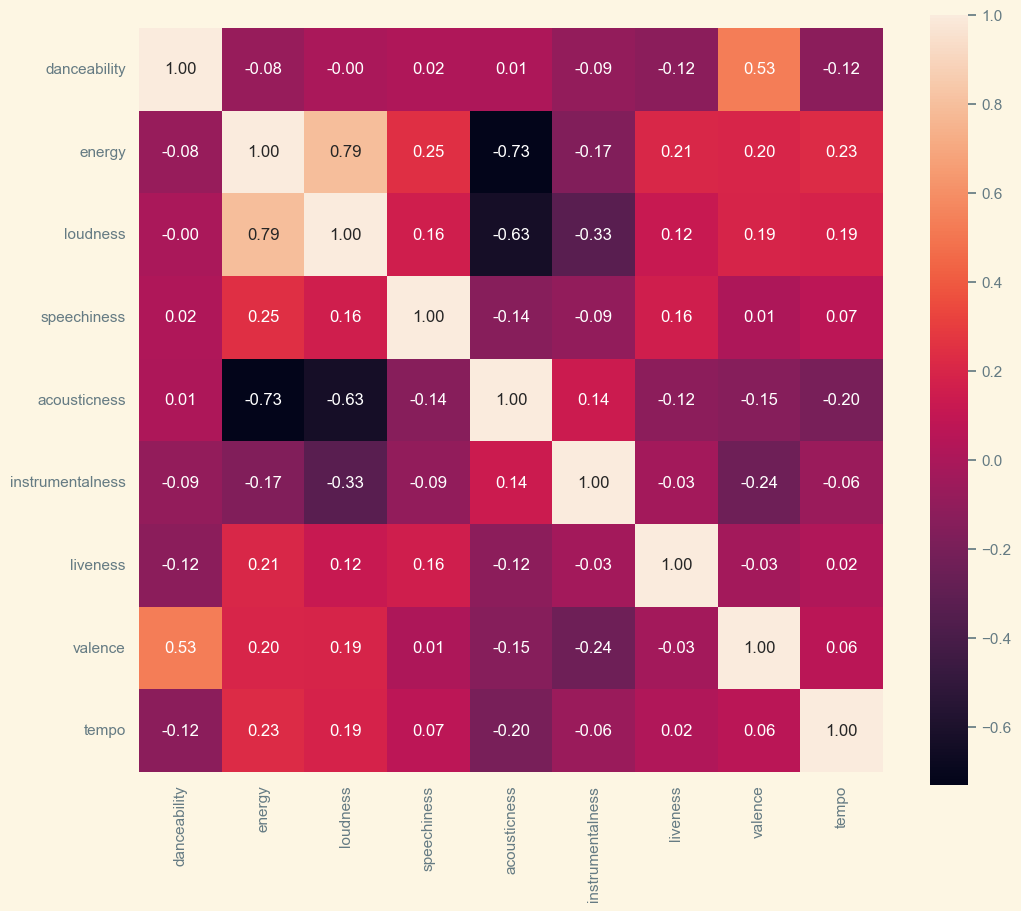

In [84]:
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', xticklabels=features, yticklabels=features)
plt.show()